In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn//datasets/SAheart.data")

In [3]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [4]:
df.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

sbp – Systolic blood pressure

tobacco – Cumulative tobacco (kg)

ldl – Low density lipoprotein cholesterol

adiposity –

famhist – Family history of heart disease (Present, Absent)

typea – Type-A behavior 

obesity –

alcohol – Current alcohol consumption

age – Age at onset

chd – Response, coronary heart disease


# How many records are present in the dataset? Print the metadata information of the dataset.

In [5]:
df.shape

(462, 11)

  In the above output, 462 represent the no.of rows which are also known as the records and 11 represent the no.of the columns in the dataset. so , in the above dataset we have 462 records.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [7]:
df.get

<bound method NDFrame.get of      row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63   

# Draw a bar plot to show the number of persons having CHD or not in comparison to those having family history of the disease or not.

<AxesSubplot:xlabel='famhist', ylabel='count'>

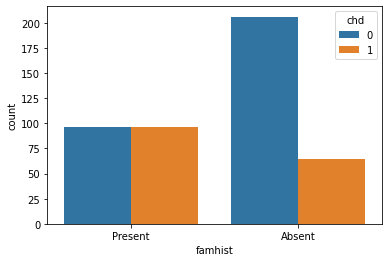

In [8]:
sns.countplot(x="famhist",data=df,hue='chd')

In [9]:
df.groupby("famhist")["chd"].value_counts()

famhist  chd
Absent   0      206
         1       64
Present  0       96
         1       96
Name: chd, dtype: int64

#  Does age have any correlation with sbp? Choose appropriate plot to show the relationship.


There is a positive correlation between age and the sbp

Text(0, 0.5, 'sbp')

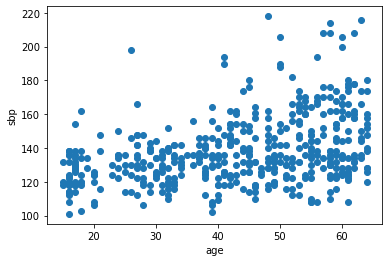

In [11]:
plt.scatter(x="age",y="sbp",data=df)
plt.xlabel("age")
plt.ylabel("sbp")


There is no correlation between the age and sbp

# Compare the distribution of tobacco consumption for persons having CHD and not having CHD. 

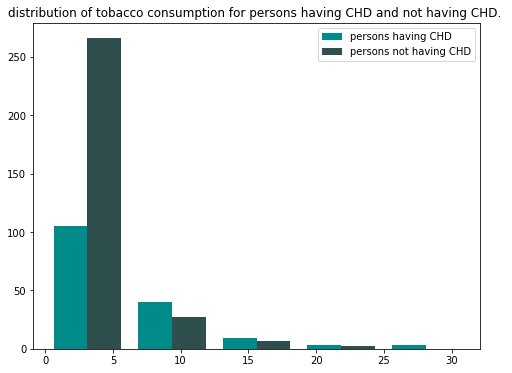

In [19]:
df1=df[df["chd"]==1]["tobacco"]
df2=df[df["chd"]==0]["tobacco"]
fig=plt.figure(figsize=(8,6))
axes1=fig.add_subplot(1,1,1)
axes1.hist([df1,df2],color=["darkcyan","darkslategrey"],label=["persons having CHD","persons not having CHD"],bins=5)
axes1.set_title("distribution of tobacco consumption for persons having CHD and not having CHD. ")
axes1.legend()

Compare the distribution of tobacco consumption for persons having CHD and not having CHD.

# Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below.

(0 – 15): young

(15 – 35): adults

(35 – 55): mid

(55 - ): old

In [22]:
def encode_(age):
    if age <= 15:
        return "young";
    elif(15<age<=35):
        return "adult";
    elif(53<age<=55):
        return "mid"
    else:
        return "old"

In [23]:
df["agegroup"]=df['age'].apply(encode_)

In [24]:
df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,old
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,old
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,old
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,old
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,old
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,mid
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,old


# Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups. 

In [ ]:
df[df["chd"]==1].groupby("agegroup")["chd"].value_counts()

# Draw a box plot to compare distributions of ldl for different age groups

<AxesSubplot:xlabel='agegroup', ylabel='ldl'>

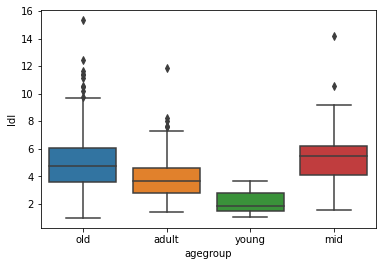

In [25]:
sns.boxplot(y=df["ldl"],x=df["agegroup"])